### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
tienda3

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Secadora de ropa,Electrodomésticos,1285100.0,66600.0,17/12/2021,Camila Rivera,Santa Marta,4,Tarjeta de crédito,4,11.24079,-74.19904
1,Mesa de noche,Muebles,290100.0,13600.0,10/02/2021,Maria Alfonso,Cali,3,Tarjeta de crédito,1,3.43722,-76.52250
2,Guitarra acústica,Instrumentos musicales,303500.0,17400.0,22/01/2023,Lucas Olivera,Bogotá,5,Tarjeta de crédito,3,4.60971,-74.08175
3,Balón de voleibol,Deportes y diversión,58800.0,3300.0,22/03/2022,Pedro Gomez,Barranquilla,4,Tarjeta de crédito,6,10.96854,-74.78132
4,Armario,Muebles,521100.0,25900.0,12/01/2022,Blanca Ramirez,Bogotá,1,Tarjeta de crédito,1,4.60971,-74.08175
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Dashboards con Power BI,Libros,26700.0,2100.0,21/10/2022,Ángel Rodriguez,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175
2355,Dashboards con Power BI,Libros,31800.0,2200.0,23/06/2022,Blanca Ramirez,Pereira,5,Tarjeta de crédito,1,4.81333,-75.69611
2356,Silla de oficina,Muebles,477100.0,25600.0,19/02/2023,Camila Rivera,Cartagena,5,Tarjeta de crédito,3,10.39972,-75.51444
2357,Mesa de centro,Muebles,123100.0,4700.0,19/09/2021,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175


In [3]:
tienda4.isnull().sum()

,0
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


#1. Análisis de facturación



In [4]:
ingreso_total_tiendas = {}

#creo un dataframe para luego usarlo en gráfico
ingreso_total_tiendas = {
    'Tienda 1': tienda.Precio.sum(),
    'Tienda 2': tienda2.Precio.sum(),
    'Tienda 3': tienda3.Precio.sum(),
    'Tienda 4': tienda4.Precio.sum()
}

df_ingresos = pd.DataFrame.from_dict(ingreso_total_tiendas,
                                   orient='index',
                                   columns=['Ingreso Total'])
df_ingresos = df_ingresos.reset_index()
df_ingresos.columns = ['Tienda', 'Ingreso Total']

print(df_ingresos[['Tienda', 'Ingreso Total']].to_string(index=False))

  Tienda  Ingreso Total
Tienda 1   1150880400.0
Tienda 2   1116343500.0
Tienda 3   1098019600.0
Tienda 4   1038375700.0


# 2. Ventas por categoría

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
tiendas = [tienda, tienda2, tienda3, tienda4]
resultados = []

for i, df_tienda in enumerate(tiendas, 1):
    agrup = (df_tienda.groupby('Categoría del Producto')['Producto']
             .count()
             .sort_values(ascending=False)
             .head(5)
             .reset_index()) #Volver a crear dataframe
    agrup['Tienda'] = str(i)
    resultados.append(agrup)

categoria_tiendas_agrupadas = pd.concat(resultados, ignore_index=True)
categoria_tiendas_agrupadas


,Categoría del Producto,Producto,Tienda
0,Muebles,465,1
1,Electrónicos,448,1
2,Juguetes,324,1
3,Electrodomésticos,312,1
4,Deportes y diversión,284,1
5,Muebles,442,2
6,Electrónicos,422,2
7,Juguetes,313,2
8,Electrodomésticos,305,2
9,Deportes y diversión,275,2


# 3. Calificación promedio de la tienda


In [7]:
#creación de data frame con promedio de tiendas
df_calificaciones = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Calificación Promedio': [
        tienda.Calificación.mean(),
        tienda2.Calificación.mean(),
        tienda3.Calificación.mean(),
        tienda4.Calificación.mean()
    ]
})

# Redondear los valores promedios
df_calificaciones['Calificación Promedio'] = df_calificaciones['Calificación Promedio'].round(2)

df_calificaciones


,Tienda,Calificación Promedio
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


# 4. Productos más y menos vendidos

In [10]:
tiendas = [tienda, tienda2, tienda3, tienda4] #Juntar las tiendas en una lista de DF
resultados = []

#Recorrer las tiendas buscando el mas y menos vendido y agregar la columna Tienda para identificarlas
for i, df_tienda in enumerate(tiendas, 1):
    # Conteo de productos, le agrego la categoría para que quede más claro
    conteo_productos = df_tienda.groupby(['Producto','Categoría del Producto']).size().reset_index(name='Cantidad')

    # Más vendidos por tienda
    mas_vendidos = conteo_productos.nlargest(5, 'Cantidad')
    mas_vendidos['Tienda'] ='Tienda '+ str(i)

    # Solo el primero es "Más Vendido"
    mas_vendidos['Tipo'] = ''
    mas_vendidos.iloc[0, mas_vendidos.columns.get_loc('Tipo')] = 'Más Vendido'

    # Menos vendidos por tienda
    menos_vendidos = conteo_productos.nsmallest(5, 'Cantidad')
    menos_vendidos['Tienda'] ='Tienda '+ str(i)

    # Solo el primero es "Menos Vendido"
    menos_vendidos['Tipo'] = ''
    menos_vendidos.iloc[0, menos_vendidos.columns.get_loc('Tipo')] = 'Menos Vendido'

    resultados.append(mas_vendidos)
    resultados.append(menos_vendidos)

# Combinar los más vendidos y los menos vendidos
productos_vendidos = pd.concat(resultados, ignore_index=True)

# Función para aplicar color al más y menos vendido por tienda
def aplicar_colores_fila(row):
    if row['Tipo'] == 'Más Vendido':
        return ['background-color: #48A13F; color:white; font-weight: bold'] * len(row)  #para darle color a toda la fila (largo de fila)
    elif row['Tipo'] == 'Menos Vendido':
        return ['background-color: #B51636; color: white; font-weight: bold'] * len(row)
    else:
        return [''] * len(row)

# Aplicar estilos
productos_con_colores = productos_vendidos.style.apply(aplicar_colores_fila, axis=1)

print("PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA")
print("="*70)
productos_con_colores


PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA


,Producto,Categoría del Producto,Cantidad,Tienda,Tipo
0,Armario,Muebles,60,Tienda 1,Más Vendido
1,Microondas,Electrodomésticos,60,Tienda 1,
2,TV LED UHD 4K,Electrónicos,60,Tienda 1,
3,Secadora de ropa,Electrodomésticos,58,Tienda 1,
4,Bloques de construcción,Juguetes,56,Tienda 1,
5,Auriculares con micrófono,Electrónicos,33,Tienda 1,Menos Vendido
6,Celular ABXY,Electrónicos,33,Tienda 1,
7,Olla de presión,Artículos para el hogar,35,Tienda 1,
8,Pandereta,Instrumentos musicales,36,Tienda 1,
9,Ciencia de datos con Python,Libros,39,Tienda 1,


# 5. Envío promedio por tienda

In [11]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Calcular promedios por tiendas
promedios_calculo = [df['Costo de envío'].mean().round(2) for df in tiendas]

# Crear DataFrame
promedios_por_tienda = pd.DataFrame({
    'Tienda': nombres_tiendas,
    'Promedio Envio': promedios_calculo
})

print("PROMEDIO DE ENVÍO POR TIENDA")
print("="*70)
color_verde = 'background-color: #48A13F; color:white; font-weight: bold'
color_rojo ='background-color: #B51636; color: white; font-weight: bold'
promedios_por_tienda.style.map(lambda x: color_verde if x == promedios_por_tienda['Promedio Envio'].min() else color_rojo if x == promedios_por_tienda['Promedio Envio'].max() else '',subset=['Promedio Envio'])



PROMEDIO DE ENVÍO POR TIENDA


,Tienda,Promedio Envio
0,Tienda 1,26018.610000
1,Tienda 2,25216.240000
2,Tienda 3,24805.680000
3,Tienda 4,23459.460000


#Gráficos

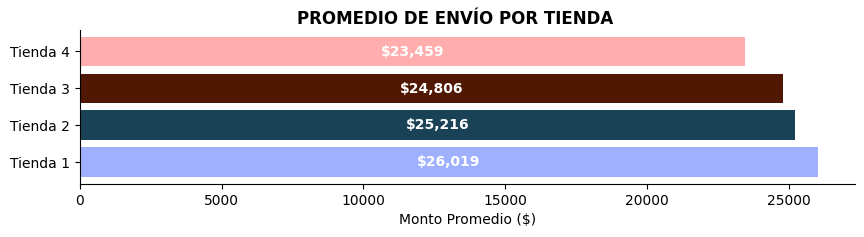

In [12]:
plt.figure(figsize=(10, 2))

bars = plt.barh(promedios_por_tienda['Tienda'], promedios_por_tienda['Promedio Envio'],
                color=plt.cm.berlin(np.linspace(0,1, len(promedios_por_tienda))),
                linewidth=1)

plt.suptitle('PROMEDIO DE ENVÍO POR TIENDA', fontsize=12, fontweight='bold')
plt.xlabel('Monto Promedio ($)')

for bar in bars:
    width = bar.get_width()
    plt.text(width / 2, bar.get_y() + bar.get_height()/2,
                f'${width:,.0f}', ha='center', va='center',
                color='white', fontweight='bold')
plt.gca().spines[['top', 'right',]].set_visible(False)

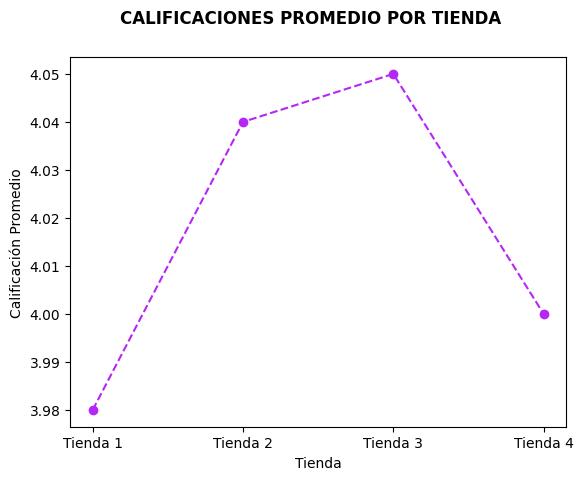

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
#df_calificaciones.groupby('Tienda').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
df_calificaciones_ordenado=  df_calificaciones.sort_values('Calificación Promedio', ascending=True)
#bars = plt.barh(df_calificaciones_ordenado['Tienda'], df_calificaciones_ordenado['Calificación Promedio'],
#                color=plt.cm.Spectral(np.linspace(0,1, len(df_calificaciones_ordenado))),
#                linewidth=1)
plt.suptitle('CALIFICACIONES PROMEDIO POR TIENDA', fontsize=12, fontweight='bold')

plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
#plt.ticklabel_format(axis='x', style='plain')
#for bar in bars:
#    width = bar.get_width()
#    plt.text(width / 2, bar.get_y() + bar.get_height()/2,
#                f'{width:,.2f}', ha='center', va='center',
#                color='white', fontweight='bold')


plt.plot(df_calificaciones['Tienda'], df_calificaciones['Calificación Promedio'], marker='o', linestyle='--', color="#B427F5", label='Data Series')

plt.show()

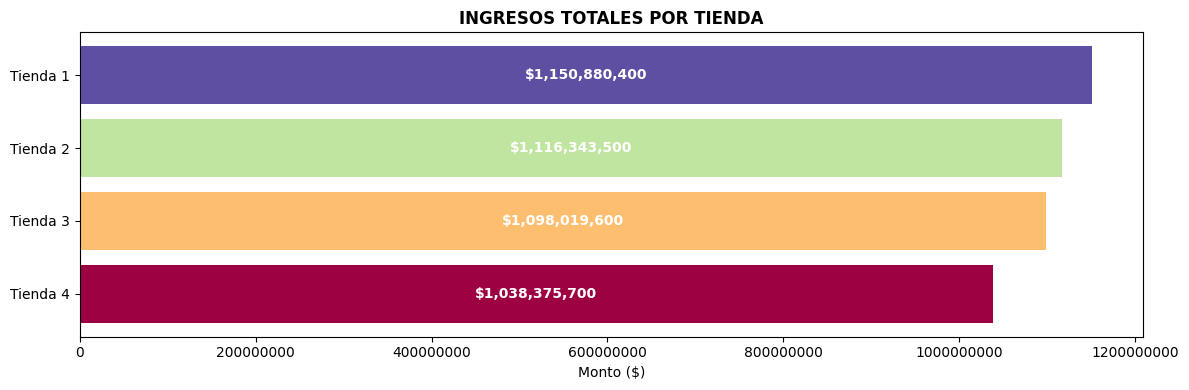

In [15]:
plt.figure(figsize=(12, 4))

df_ordenado = df_ingresos.sort_values('Ingreso Total', ascending=True)

bars = plt.barh(df_ordenado['Tienda'], df_ordenado['Ingreso Total'],
                color=plt.cm.Spectral(np.linspace(0,1, len(df_ordenado))),
                linewidth=1)

plt.title('INGRESOS TOTALES POR TIENDA', fontweight='bold', fontsize=12)
plt.xlabel('Monto ($)')

plt.ticklabel_format(axis='x', style='plain') #Plain para que salgan los montos completos, si no salen como 0.1

for bar in bars:
    width = bar.get_width()
    plt.text(width / 2, bar.get_y() + bar.get_height()/2,
                f'${width:,.0f}', ha='center', va='center',
                color='white', fontweight='bold')

plt.tight_layout()
plt.savefig('ingresos_totales_tiendas.png', dpi=300, bbox_inches='tight')
plt.show()

##CONCLUSIONES
De acuerdo a lo analizado, se recomienda al Señor Juan vender la Tienda 4, considerado que a pesar de tener una mayor lógisca en envíos, sigue presentando un monto de ingresos significativamente menor al resto de las otras tiendas, además de no destacar en Servicios de atención al cliente.

Sin embargo se recomienda implementar la logística de envíos realizada en la Tienda 1, ya que es la que genera mayores ingresos por sobre el resto de las tiendas, lo que impulsaría aún más la eficiencia de esta tienda.